In [47]:
%pip install openpyxl
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
  Using cached scikit_learn-1.5.0-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.0-cp39-cp39-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [39]:
hand_val = pd.read_excel('Вручную снятые измерения.xlsx', index_col='Изображение')
auto_val = pd.read_excel('Вручную снятые измерения.xlsx', index_col='Изображение')
#auto_val.columns = hand_val.columns
#auto_val.columns

In [40]:
hand_val = hand_val.iloc[59:][hand_val.columns[:5]]
auto_val = auto_val.iloc[59:][auto_val.columns[9:]]
auto_val.columns = hand_val.columns

In [50]:
from sklearn.metrics import root_mean_squared_error

In [51]:
def find_smape(auto, hand):
    return np.abs(auto - hand) / ((auto + hand)/2) * 100

In [52]:
def find_metric_for_col(col, metric):

    sh_auto = auto_val[col]
    sh_hand = hand_val[col]

    return metric(sh_auto, sh_hand)

### Ширина

In [54]:
find_metric_for_col('Ширина', root_mean_squared_error)

0.18067011915592762

### Глубина

In [55]:
find_metric_for_col('Глубина', root_mean_squared_error)

0.2230046040442119

### Линейное смещение

In [56]:
find_metric_for_col('Линейное смещение', root_mean_squared_error)

0.03919137761672331

In [149]:
auto = auto_val['Линейное смещение']
hand = hand_val['Линейное смещение']
thresh = hand.mean()
mask = hand > thresh

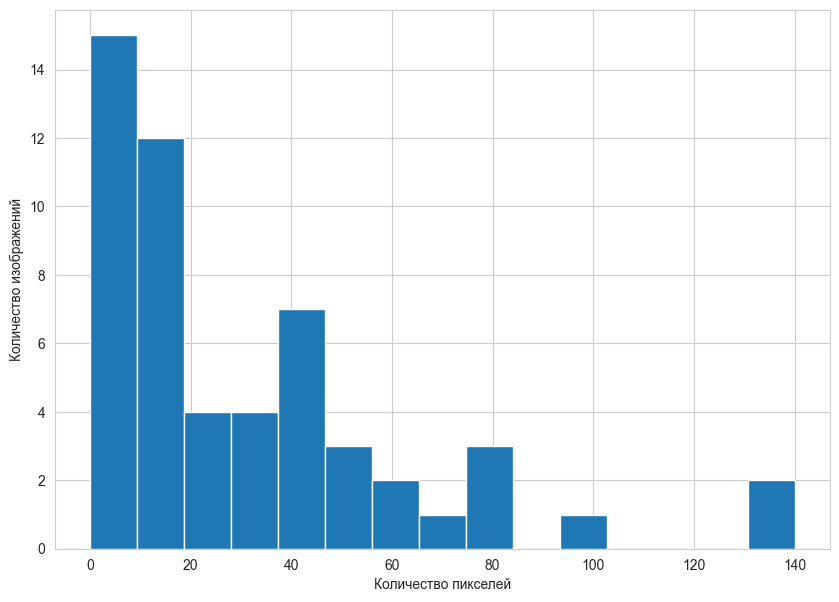

In [117]:
plt.figure(figsize=(10, 7))
plt.hist(hand, bins=15)
plt.xlabel("Количество пикселей")
plt.ylabel("Количество изображений")
plt.show()

### Сэггинг

In [113]:
find_metric_for_col('Сэггинг')

34.78476815018886

In [146]:
auto = auto_val['Сэггинг']
hand = hand_val['Сэггинг']
thresh = hand.mean()
mask = hand > thresh

In [147]:
hand.mean()

30.796296296296298

In [148]:
find_smape(auto[mask], hand[mask]).mean()

10.067904683998542

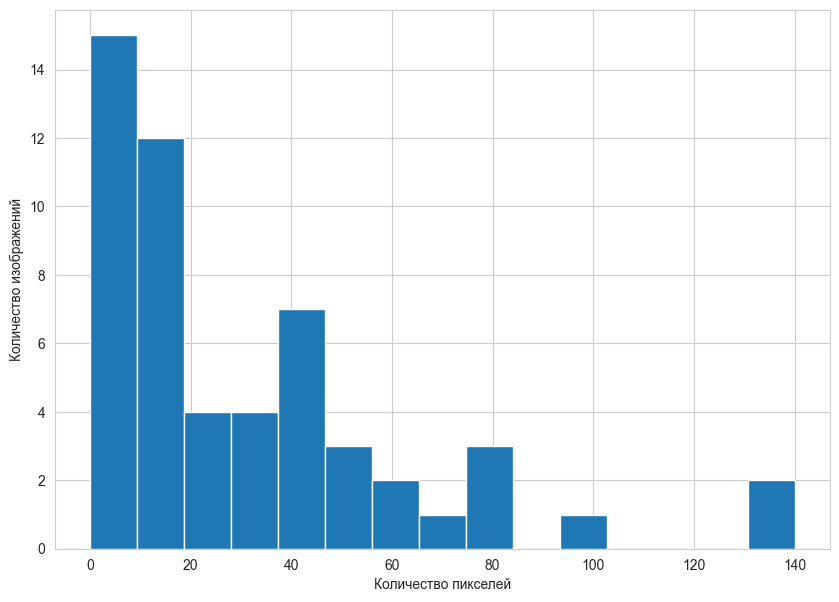

In [120]:
plt.figure(figsize=(10, 7))
plt.hist(hand, bins=15)
plt.xlabel("Количество пикселей")
plt.ylabel("Количество изображений")
plt.show()

### Подрез

In [152]:
find_metric_for_col('Подрез')

22.40816383578689

In [153]:
auto = auto_val['Подрез']
hand = hand_val['Подрез']
thresh = hand.mean()
mask = hand > thresh
hand.mean()

57.7962962962963

In [154]:
find_smape(auto[mask], hand[mask]).mean()

7.182477798489794

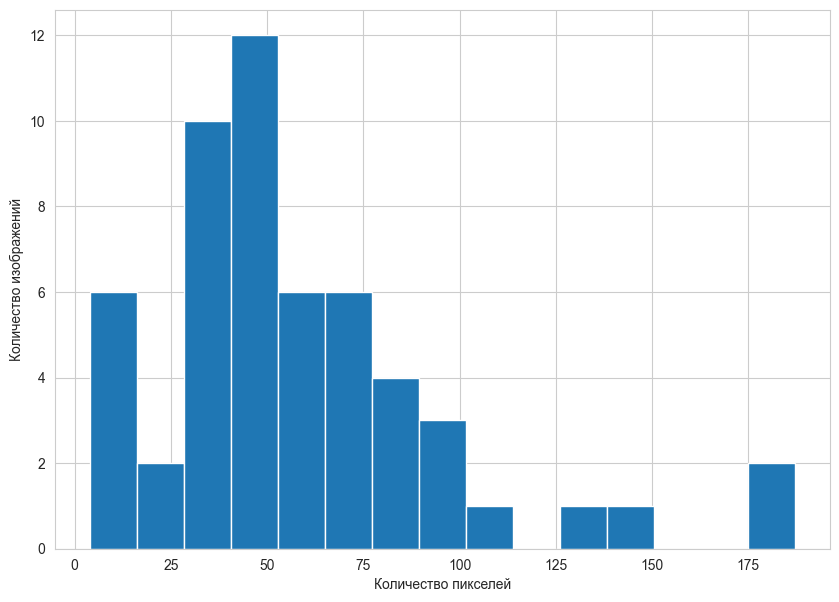

In [155]:
plt.figure(figsize=(10, 7))
plt.hist(hand, bins=15)
plt.xlabel("Количество пикселей")
plt.ylabel("Количество изображений")
plt.show()

### Оценка по дефектам и категориям

In [57]:
def find_quality_level(t, h, b_coef, c_coef, d_coef):
    '''
    Исходя из параметров нахождение уровня качества шва
    '''
    if h <= b_coef * t:
        quality_level = 'B'
    elif h <= c_coef * t:
        quality_level = 'C'
    elif h <= d_coef * t:
        quality_level = 'D'
    else:
        quality_level = 'Дефект'
        
    return quality_level

find_quality_level = np.vectorize(find_quality_level)

In [230]:
hand_val = pd.read_excel('Вручную снятые измерения.xlsx', index_col='Изображение')
auto_val = pd.read_excel('pxl_parameters.xlsx', index_col='Изображение')
auto_val.columns = hand_val.columns

In [58]:
# Толщина пластин
t = 3

In [59]:
qual_level_disp_hand = find_quality_level(t, 
                                     hand_val['Линейное смещение'], 
                                     0.1, 
                                     0.15,
                                     0.25)
qual_level_disp_hand

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'C'], dtype='<U1')

In [60]:
qual_level_sag_hand = find_quality_level(t,
                                    hand_val['Сэггинг'],
                                    0.1,
                                    0.2,
                                    0.3)
qual_level_sag_hand

array(['C', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B'], dtype='<U1')

In [61]:
qual_level_undercut_hand = find_quality_level(t,
                                         hand_val['Подрез'],
                                         0.05,
                                         0.1,
                                         0.15)
qual_level_undercut_hand

array(['D', 'C', 'C', 'Дефект', 'B', 'C', 'B', 'B', 'B', 'B', 'C',
       'Дефект', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'B', 'B', 'B', 'D',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'C', 'C', 'C',
       'C', 'C', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'C', 'C', 'B', 'B'], dtype='<U6')

In [62]:
qual_level_disp_auto = find_quality_level(t, 
                                     auto_val['Линейное смещение'], 
                                     0.1, 
                                     0.15,
                                     0.25)
qual_level_disp_auto

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'C'], dtype='<U1')

In [63]:
qual_level_sag_auto = find_quality_level(t,
                                    auto_val['Сэггинг'],
                                    0.1,
                                    0.2,
                                    0.3)
qual_level_sag_auto

array(['C', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B'], dtype='<U1')

In [64]:
qual_level_undercut_auto = find_quality_level(t,
                                         auto_val['Подрез'],
                                         0.05,
                                         0.1,
                                         0.15)
qual_level_undercut_auto

array(['D', 'C', 'C', 'D', 'B', 'C', 'B', 'B', 'B', 'B', 'C', 'D', 'B',
       'B', 'B', 'C', 'B', 'B', 'C', 'B', 'B', 'B', 'C', 'C', 'B', 'B',
       'B', 'C', 'B', 'C', 'C', 'C', 'B', 'C', 'B', 'B', 'C', 'C', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'C', 'B', 'B'], dtype='<U1')

In [65]:
(qual_level_disp_hand == qual_level_disp_auto).sum()

56

In [66]:
(qual_level_sag_hand == qual_level_sag_auto).sum()

56

In [67]:
(qual_level_undercut_hand == qual_level_undercut_auto).sum()

45